# **Final Project**

# **1.Data Collection and preprocessing***

In [ ]:
 #Import the required values
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import re
import string
import requests
from time import sleep
from random import randint
import seaborn as sns
import matplotlib.pyplot as plt

Collecting the First 100 movies

***Comment from group: Scraping the data was originally a struggle, but once realizing blank lists could store our information serperately and cleaning out characters, spaces, and punctuation that was not needed, we were able to get a good output to continue the rest of our project. Also we only scraped 100 movies, when using a bigger dataset could've helped with correlation graphs and getting more accurate data ***

In [ ]:
#Scraping the Data
from matplotlib.rcsetup import validate_font_properties

pages = np.arange(1, 50, 50)
years=[]
movies=[]
ratings=[]
scores=[]
certifications=[]
durations=[]
genres=[]
votes_counted=[]
directors=[]
revenues=[]
descriptions=[]

for page in pages:
  page=requests.get('https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=' +str(page) +'&ref=advnxt')

  soup=BeautifulSoup(page.text,'html.parser')

  movie_data= soup.find_all('div',class_='lister-item mode-advanced')

  sleep(randint(2,8))

for item in movie_data:

  #year
  year=item.find('span',class_='lister-item-year').text.strip()
  year_clean = str(year).replace('(','').replace(')','').replace('I','').replace(' ','')

  #movie
  movie_header=item.find('h3', class_='lister-item-header')
  movie_title=movie_header.find('a').text.strip()

  #rating
  rating=item.find('strong').text.strip()

  #score
  score=item.find('span', class_='metascore')
  if score is not None:
    score = score.text.strip()
  else:
    score = ''

  #certification
  certification=item.find('span', class_='certificate')
  if certification is not None:
    certification = certification.text.strip()
  else:
    certification = ''

  #duration
  duration=item.find('span', class_='runtime').text.strip()

  #genre
  genre=item.find('span', class_='genre').text.strip()

  #votes
  votes=item.find('span', {"name":"nv"}).text.strip()
  votes= str(votes).replace(',','')

  #directors
  directors_wrapper=item.find('div', class_='lister-item-content')
  dw_p_list = directors_wrapper.find_all('p')
  dw_cleaning = dw_p_list[2]
  director = dw_cleaning.find_all('a')
  director = director[0].text.strip()

  #revenues
  revenue_wrapper = item.find('p', class_='sort-num_votes-visible')
  revenue=revenue_wrapper.find('span', {"name":"nv"})['data-value']
  revenue= str(revenue).replace(',','')

  #descrption
  description = dw_p_list[1].text.strip()

  #appending
  years.append(year_clean)
  movies.append(movie_title)
  ratings.append(rating)
  scores.append(score)
  certifications.append(certification)
  durations.append(duration)
  genres.append(genre)
  votes_counted.append(votes)
  directors.append(director)
  revenues.append(revenue)
  descriptions.append(description)

movie_dict = {
    'Year':years,
    'Title':movies,
    'Rating':ratings,
    'Score':scores,
    'Certification':certifications,
    'Duration':durations,
    'Genre': genres,
    'Votes': votes_counted
}
df=pd.DataFrame(movie_dict,columns=['Year', 'Title', 'Rating', 'Score', 'Certification', 'Duration', 'Genre', 'Votes'])
df['Directors']=directors
df['Revenue']=revenues
df['Description']=descriptions

##sorting by year attempt
df1 = df.sort_values(by=["Year"])
df1


,Year,Title,Rating,Score,Certification,Duration,Genre,Votes,Directors,Revenue,Description
60,1931,City Lights,8.5,99,G,87 min,"Comedy, Drama, Romance",185427,Charles Chaplin,185427,"With the aid of a wealthy erratic tippler, a d..."
59,1936,Modern Times,8.5,96,G,87 min,"Comedy, Drama, Romance",243193,Charles Chaplin,243193,The Tramp struggles to live in modern industri...
98,1940,The Great Dictator,8.4,,G,125 min,"Comedy, Drama, War",224696,Charles Chaplin,224696,Dictator Adenoid Hynkel tries to expand his em...
58,1942,Casablanca,8.5,100,PG,102 min,"Drama, Romance, War",572025,Michael Curtiz,572025,A cynical expatriate American cafe owner strug...
36,1946,It's a Wonderful Life,8.6,89,PG,130 min,"Drama, Family, Fantasy",456675,Frank Capra,456675,An angel is sent from Heaven to help a despera...
...,...,...,...,...,...,...,...,...,...,...,...
9,2022,Rocketry: The Nambi Effect,8.8,,,157 min,"Biography, Drama",50248,Madhavan,50248,Based on the life of Indian Space Research Org...
23,2022,Kantara,8.6,,,148 min,"Action, Adventure, Drama",79832,Rishab Shetty,79832,It involves culture of Kambala and Bhootha Kol...
7,2022,777 Charlie,8.9,,,164 min,"Adventure, Comedy, Drama",31263,Kiranraj K,31263,Dharma is stuck in a rut with his negative and...
76,2022,K.G.F: Chapter 2,8.4,,Not Rated,168 min,"Action, Crime, Drama",132669,Prashanth Neel,132669,"In the blood-soaked Kolar Gold Fields, Rocky's..."


In [ ]:
#download .csv
from google.colab import drive
drive.mount("drive", force_remount=True)

df1.to_csv('/content/drive/My Drive/final_project.csv', encoding='utf-8')

Mounted at drive


# **2. EDA**
You must use some plots when answering  some of the questions in this section.

In [ ]:
#What are the most popular movies in terms of Votes?
df['Votes']=df['Votes'].astype(int)
df_votes = df.sort_values(by = ['Votes'], ascending=False)
df_votes.head()

,Year,Title,Rating,Score,Certification,Duration,Genre,Votes,Directors,Revenue,Description
0,1994,The Shawshank Redemption,9.3,81,R,142 min,Drama,2671076,Frank Darabont,2671076,Two imprisoned men bond over a number of years...
2,2008,The Dark Knight,9.0,84,PG-13,152 min,"Action, Crime, Drama",2643895,Christopher Nolan,2643895,When the menace known as the Joker wreaks havo...
11,2010,Inception,8.8,74,PG-13,148 min,"Action, Adventure, Sci-Fi",2343355,Christopher Nolan,2343355,A thief who steals corporate secrets through t...
13,1999,Fight Club,8.8,66,R,139 min,Drama,2116493,David Fincher,2116493,An insomniac office worker and a devil-may-car...
15,1994,Forrest Gump,8.8,82,PG-13,142 min,"Drama, Romance",2071112,Robert Zemeckis,2071112,"The presidencies of Kennedy and Johnson, the V..."


In [ ]:
#Which are  the highest (top 3) and lowest(bottom 5) rated movies in terms of Score?
df1_filtered_score = df[df.Score != ''].copy(deep=True)
df1_filtered_score['Score']=df1_filtered_score['Score'].astype(int)
df_score = df1_filtered_score.sort_values(by = 'Score', ascending = False)
print('Top 3 Highest Rated Movies in Terms of Score:  ')
display(df_score.head(3))
print('Lowest 5 rated Movies in Terms of Score: ')
display(df_score.tail(5).sort_values(by = 'Score'))

Top 3 Highest Rated Movies in Terms of Score:  


,Year,Title,Rating,Score,Certification,Duration,Genre,Votes,Directors,Revenue,Description
58,1942,Casablanca,8.5,100,PG,102 min,"Drama, Romance, War",572025,Michael Curtiz,572025,A cynical expatriate American cafe owner strug...
57,1954,Rear Window,8.5,100,PG,112 min,"Mystery, Thriller",492132,Alfred Hitchcock,492132,A wheelchair-bound photographer spies on his n...
1,1972,The Godfather,9.2,100,R,175 min,"Crime, Drama",1851167,Francis Ford Coppola,1851167,The aging patriarch of an organized crime dyna...


Lowest 5 rated Movies in Terms of Score: 


,Year,Title,Rating,Score,Certification,Duration,Genre,Votes,Directors,Revenue,Description
41,2011,The Intouchables,8.5,57,R,112 min,"Biography, Comedy, Drama",856807,Olivier Nakache,856807,After he becomes a quadriplegic from a paragli...
65,2019,Joker,8.4,59,R,122 min,"Crime, Drama, Thriller",1276021,Todd Phillips,1276021,A mentally troubled stand-up comedian embarks ...
29,1997,Life Is Beautiful,8.6,59,PG-13,116 min,"Comedy, Drama, Romance",694296,Roberto Benigni,694296,When an open-minded Jewish waiter and his son ...
28,1999,The Green Mile,8.6,61,R,189 min,"Crime, Drama, Fantasy",1298229,Frank Darabont,1298229,The lives of guards on Death Row are affected ...
46,1998,American History X,8.5,62,R,119 min,"Crime, Drama",1121125,Tony Kaye,1121125,A former neo-nazi skinhead tries to prevent hi...


**Comment from group: Below, we cleaned the genre column by splitting it by the comma in the string and used the for loop to duplicate rows so each genre was matched to the appropriate movie. Then aggregated the rating mean to get an output of the top 5 movie genres.**

In [ ]:
#What are  the most popular genres(top 5)?
#by_genre=df1.sort_values(['Rating','Genre'], ascending=False).head(5)
#by_genre[['Rating','Genre']].head()

#cleaning
genres_cl, rating_cl, revenue_cl, votes_cl, duration_cl=[],[],[],[],[]
for i in range(0,len(df['Genre'])):
  genre_split=df['Genre'][i].split(', ')
  for x in genre_split:
    genres_cl.append(x)
    rating_cl.append(df['Rating'][i])
    revenue_cl.append(df['Revenue'][i])
    votes_cl.append(df['Votes'][i])
    duration_cl.append(df['Duration'][i])

cl_dict = {
    'Genres': genres_cl,
    'Rating': rating_cl,
    'Revenue': revenue_cl,
    'Votes': votes_cl,
    'Duration': duration_cl
}
df_cl=pd.DataFrame(cl_dict,columns=['Genres','Rating','Votes', 'Revenue', 'Duration'])
df_cl['Rating']=df_cl['Rating'].astype(float)
genre_grouped = df_cl.groupby(['Genres']).agg({'Rating': ['mean']})
genre_grouped.columns=['Rating_mean']
genre_grouped2 = genre_grouped.sort_values(by = ['Rating_mean'],  ascending=False)
print('The Top 5 Movie Genres by Movie Rating: ')
genre_grouped2.head()

The Top 5 Movie Genres by Movie Rating: 


,Rating_mean
Genres,
Crime,8.621739
History,8.600000
Adventure,8.582609
Fantasy,8.580000
Drama,8.570130


In [ ]:
#Who are  the most popular directors in terms of number of Votes?
#dir_votes=df1.sort_values(['Votes'],ascending=False).head()
#dir_votes[['Directors','Votes']].head()
df1['Votes']=df['Votes'].astype(int)
directors_agg=df1.groupby(['Directors']).agg({'Votes':['sum']})
directors_agg.columns = ['Votes_Sum']
directors_agg = directors_agg.sort_values(by = ['Votes_Sum'], ascending = False)
print('Top 5 Most Popular Directors in Terms of Number of Votes: ')
directors_agg.head()

Top 5 Most Popular Directors in Terms of Number of Votes: 


,Votes_Sum
Directors,
Christopher Nolan,11074043
Peter Jackson,5373366
Frank Darabont,3969305
Francis Ford Coppola,3786123
David Fincher,3763401


In [ ]:
#Which  movies(top 5) that have the longest Runtimes(minutes)?
df1['Duration'] = df1['Duration'].str.extract('(\d+)', expand=False)
df1['Duration'] = df1['Duration'].astype(int)
by_runtime=df1.sort_values(['Duration'], ascending=False).head(5)
by_runtime[['Title','Duration']].head()

,Title,Duration
35,Seven Samurai,207
5,The Godfather Part II,202
3,The Lord of the Rings: The Return of the King,201
4,Schindler's List,195
28,The Green Mile,189


In [ ]:
#Which  movies (top 5) that have the shortest Runtimes(minutes)?
df1['Duration'] = df1['Duration'].astype(int)
by_runtime=df1.sort_values(['Duration'], ascending=True).head(5)
by_runtime[['Title','Duration']].head()

,Title,Duration
60,City Lights,87
59,Modern Times,87
49,The Lion King,88
96,Paths of Glory,88
51,Grave of the Fireflies,89


***Comment from group: We are pretty proud of how we split decade. We used a for loop to get the first 3 characters of the year values and then appended a '0' to the end to create our decades. We then used the .agg functions with new data frames for both tables. ***

In [ ]:
#Which decade had the movies with the shortest Runtimes?
#by_runtime_s=df1.sort_values(['Duration'], ascending=True).head(5)
#by_runtime_s[['Year','Title','Duration']].head()
df1['Duration'] = df1['Duration'].astype(int)
Decades=[]
for i in df1['Year'].to_list():
  Decades.append(str(i[:3])+'0')
df1['Decade'] = Decades
decades_agg=df1.groupby(['Decade']).agg({'Duration':['mean']})
decades_agg.columns=['Duration_mean']
decades_agg = decades_agg.sort_values(by = ['Duration_mean'])
print('The 5 Decades Which Had the Shortest Average Runtime: ')
display(decades_agg.head())

decades_agg2=df1.groupby(['Decade']).agg({'Duration':['min']})
decades_agg2.columns=['Duration_min']
decades_agg2 = decades_agg2.sort_values(by = ['Duration_min'])
print('The 5 Decades Which Had the Shortest Single Movie Runtime: ')
display(decades_agg2.head())


The 5 Decades Which Had the Shortest Average Runtime: 


,Duration_mean
Decade,
1930,87.000000
1940,119.000000
1950,121.500000
1980,133.300000
1960,137.166667


The 5 Decades Which Had the Shortest Single Movie Runtime: 


,Duration_min
Decade,
1930,87
1950,88
1990,88
1980,89
1960,95


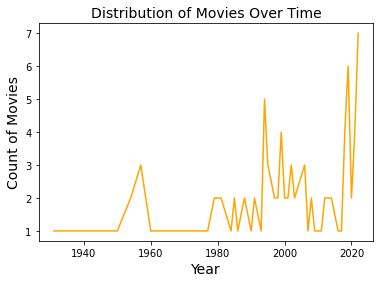

In [ ]:
#Show the distribution of movies over time.*
df1['Year']=df1['Year'].astype(int)
movie_dist= df1.groupby('Year').size().to_frame('Count of Movies')
fig1, ax1 = plt.subplots()
ax1.plot(movie_dist.index,
        movie_dist['Count of Movies'],
        color="orange")
# set x-axis label
ax1.set_xlabel("Year", fontsize = 14)
# set y-axis label
ax1.set_ylabel("Count of Movies",
              fontsize=14)
plt.title('Distribution of Movies Over Time', fontsize=14)
plt.show()


**Comment from group: The graph below was a little challenging to put together. We imported mpatches to get the legend in this graph formatted the way it is.**

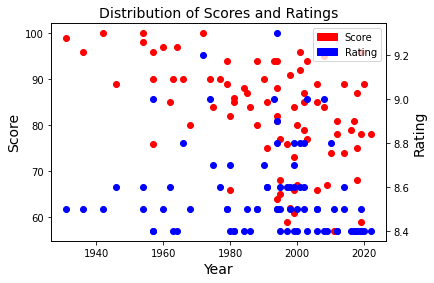

In [ ]:
#Show the distribution of Scores and film critic ratings(Metascore) on a single chart.*
import matplotlib.patches as mpatches

df1_filtered_score = df[df.Score != ''].copy(deep=True)
df1_filtered_score['Year'] = df1_filtered_score['Year'].astype(int)
df1_filtered_score['Score'] = df1_filtered_score['Score'].astype(int)
df1_filtered_score['Rating'] = df1_filtered_score['Rating'].astype(float)
fig,ax = plt.subplots()
# make a plot
ax.scatter(df1_filtered_score.Year,
        df1_filtered_score.Score,
        color="red")
# set x-axis label
ax.set_xlabel("Year", fontsize = 14)
# set y-axis label
ax.set_ylabel("Score",
              fontsize=14)

ax2 = ax.twinx()
ax2.scatter(df1_filtered_score.Year, df1_filtered_score.Rating,color="blue")
ax2.set_ylabel("Rating",fontsize=14)
plt.title('Distribution of Scores and Ratings', fontsize=14)
red_patch = mpatches.Patch(color='red', label='Score')
blue_patch = mpatches.Patch(color='blue', label='Rating')
plt.legend(handles=[red_patch, blue_patch])
plt.show()



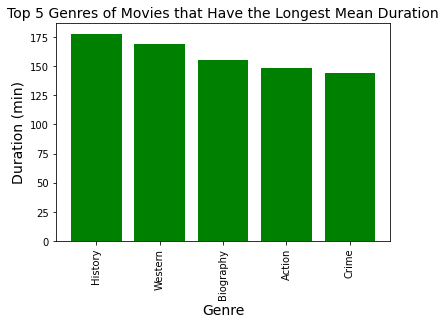

In [ ]:
#Create a chart to display  the genres of movies (top 5) that have the longest duration(minutes).
df_cl['Duration_Clean']=df_cl['Duration'].str.replace(' min', '')
df_cl['Duration_Clean']=df_cl['Duration_Clean'].astype(int)
df_cl2 = df_cl.sort_values(by = 'Duration_Clean')
genre_grouped2 = df_cl2.groupby(['Genres']).agg({'Duration_Clean': ['mean']})
genre_grouped2.columns=['Duration_mean']
genre_grouped2 = genre_grouped2.sort_values(by = ['Duration_mean'],  ascending=False).head()
plt.bar(genre_grouped2.index, genre_grouped2['Duration_mean'], color = 'green')
plt.xticks(rotation=90)
plt.xlabel("Genre", fontsize =14)
plt.ylabel("Duration (min)", fontsize=14)
plt.title('Top 5 Genres of Movies that Have the Longest Mean Duration', fontsize=14)
plt.show()

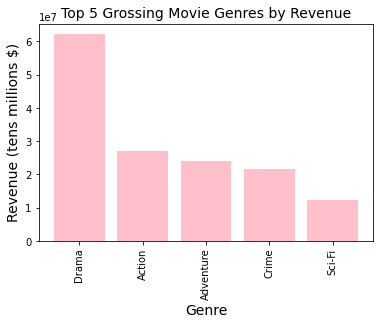

In [ ]:
#Create 3 additional analyses or your choice that you believe provide more insight into the data.*
# 1. Popularity of Movie Genre by Revenue
df_cl['Revenue']=df_cl['Revenue'].astype(int)
genre_grouped3 = df_cl.groupby(['Genres']).agg({'Revenue': ['sum']})
genre_grouped3.columns=['Total_Revenue']
genre_grouped3 = genre_grouped3.sort_values(by = ['Total_Revenue'],  ascending=False).head()
plt.bar(genre_grouped3.index, genre_grouped3['Total_Revenue'], color = 'pink')
plt.xticks(rotation=90)
plt.xlabel("Genre", fontsize =14)
plt.ylabel("Revenue (tens millions $)", fontsize=14)
plt.title('Top 5 Grossing Movie Genres by Revenue', fontsize=14)
plt.show()


***Comment from group: Below we used the pandas crosstab function and then created a stacked chart to show variability in certification. We thought this was an interesting way to show what decades from the movies scraped had the most diverse movie certification selection. ***

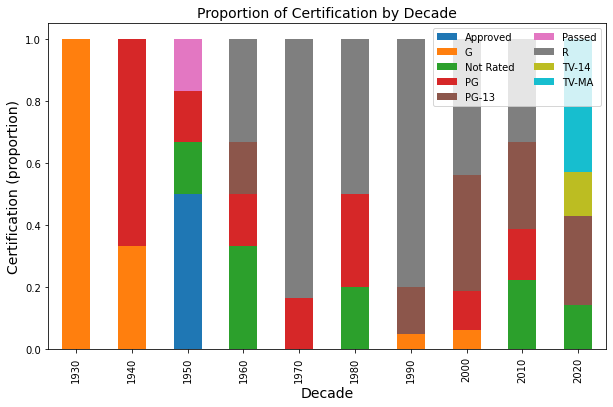

In [ ]:
# 2. Certification by Decade
df1_ = df1[df1.Certification != ''].copy(deep=True)
cross_tab_prop = pd.crosstab(index=df1_['Decade'],
                             columns=df1_['Certification'],
                             normalize="index")
cross_tab = pd.crosstab(index=df1_['Decade'],
                        columns=df1_['Certification'])
cross_tab_prop.plot(kind='bar',
                    stacked=True,
                    colormap='tab10',
                    figsize=(10, 6))

plt.legend(loc="upper right", ncol=2)
plt.xlabel("Decade", fontsize = 14)
plt.ylabel("Certification (proportion)", fontsize =14)
plt.title('Proportion of Certification by Decade', fontsize=14)
plt.show()

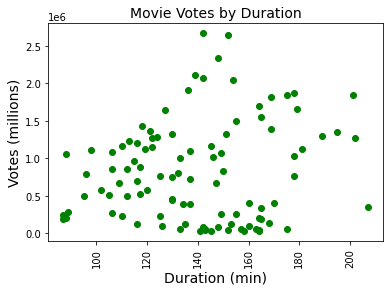

In [ ]:
#3. Movie Rating by Duration
df_cl['Votes']=df_cl['Votes'].astype(int)
df_cl2 = df_cl.sort_values(by = 'Duration_Clean')
votes_group = df_cl2.groupby(['Votes']).agg({'Duration_Clean': ['mean']})
votes_group.columns=['Duration_mean']
votes_group = votes_group.sort_values(by = ['Duration_mean'],  ascending=False)
plt.scatter(votes_group['Duration_mean'], votes_group.index, color = 'green')
plt.xticks(rotation=90)
plt.xlabel('Duration (min)', fontsize =14)
plt.ylabel("Votes (millions)", fontsize=14)
plt.title('Movie Votes by Duration', fontsize=14)
plt.show()

# **3.Bivariate Analysis**
You must use two different types of plots to answer the questions in this section.

***Comment from group: Below, We recognize that if we used a larger scrape we could have had more of a relationship being seen in these values, but with a small sample size of 100, it resulted in less corrleation than we expected. ***

In [ ]:
IMDB_score=[]
x1=1
for i in range(0,100):
  IMDB_score.append(x1)
  x1+=1
df['IMDB Score'] = IMDB_score


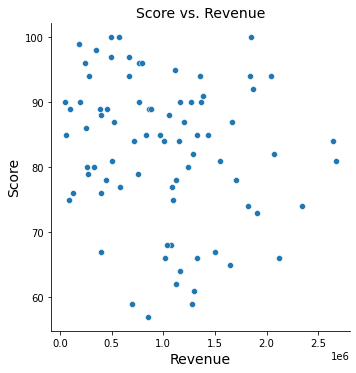

In [ ]:
#Is there a  relationship between revenue and IMDB Score?
df['Revenue']=pd.to_numeric(df['Revenue'])
df['Score']=pd.to_numeric(df['Score'])

sns.relplot(data = df, x = 'Revenue', y = 'Score')
df['Revenue'].corr(df['Score'])
plt.xlabel('Revenue', fontsize =14)
plt.ylabel("Score", fontsize=14)
plt.title('Score vs. Revenue', fontsize=14)
plt.show()

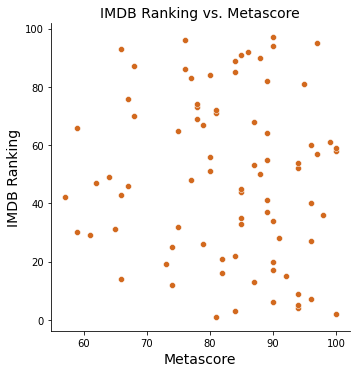

In [ ]:
#Create a chart and show the relationship between the Metascore and  the IMDB score.
df['IMDB Score']=pd.to_numeric(df['IMDB Score'])
df['Score']=pd.to_numeric(df['Score'])

sns.relplot(data = df, x = 'Score', y = 'IMDB Score', color = 'chocolate')
df['IMDB Score'].corr(df['Score'])
plt.xlabel('Metascore', fontsize =14)
plt.ylabel("IMDB Ranking", fontsize=14)
plt.title('IMDB Ranking vs. Metascore', fontsize=14)
plt.show()

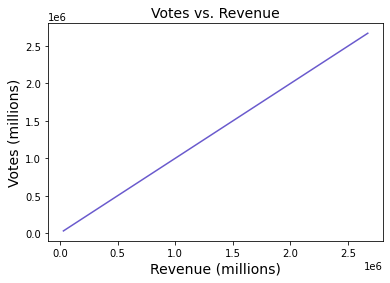

In [ ]:
#Create 2 more charts if your choice that show the relationships between any variables of your choice*
#1. Year and Votes
df['Revenue']=pd.to_numeric(df['Revenue'])
df['Votes']=pd.to_numeric(df['Votes'])

sns.lineplot(data = df, x = 'Revenue', y = 'Votes', color = 'slateblue')
df['Revenue'].corr(df['Votes'])
plt.xlabel('Revenue (millions)', fontsize =14)
plt.ylabel("Votes (millions)", fontsize=14)
plt.title('Votes vs. Revenue', fontsize=14)
plt.show()

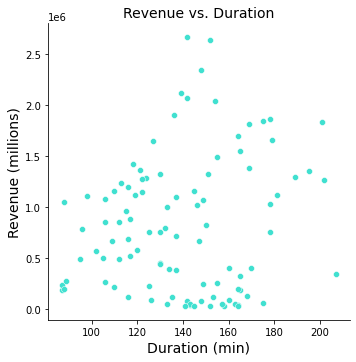

In [ ]:
#2. Revenue vs. Duration
df1['Revenue']=pd.to_numeric(df1['Revenue'])
df1['Duration']=pd.to_numeric(df1['Duration'])
sns.relplot(data = df1, x = 'Duration', y = 'Revenue', color = 'turquoise')
df1['Revenue'].corr(df1['Duration'])
plt.xlabel('Duration (min)', fontsize =14)
plt.ylabel("Revenue (millions)", fontsize=14)
plt.title('Revenue vs. Duration', fontsize=14)
plt.show()

# **4.Text Analysis**

In [ ]:
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Excluding stopwords, what are the 10 most popular words used in movie titles?
df['Title']=df['Title'].str.lower()

stop_words = stopwords.words('english')
no_stopwords = df['Title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

from collections import Counter
p = Counter(" ".join(no_stopwords).split()).most_common(10)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)

        Word  Frequency
0       lord          3
1     rings:          3
2  godfather          2
3       dark          2
4     knight          2
5       king          2
6       star          2
7       back          2
8       city          2
9       life          2


***Comment from group: We imported our necessary libraries for this text analysis section of the report and then used a heatmap to show the correlation between multiple variables. We think this graphic was a good way to show and understand this kind of data. ***

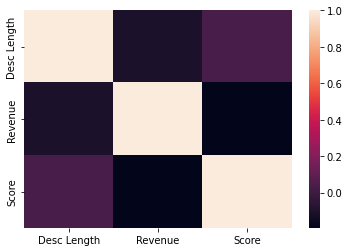

             Desc Length   Revenue     Score
Desc Length     1.000000 -0.107494  0.036742
Revenue        -0.107494  1.000000 -0.193044
Score           0.036742 -0.193044  1.000000


In [ ]:
#Do movies with longer descriptions generate more revenue or have higher Metascores?
df_long=pd.DataFrame(df,columns=['Desc Length','Revenue','Score'])
df["Desc Length"]= df["Description"].apply(len)
df["Revenue"] = pd.to_numeric(df["Revenue"])
df["Score"] = pd.to_numeric(df["Score"])


cor=df_long.corr()
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cor)
plt.show()
print(cor)

**Comment from group: Below, the question on sentiment had its challenges. We originally had a block of cleaning code above what is displayed now, but after considering what the code was actually doing we were able to remove it and cut it down to what is below. We downloaded the SentimentIntensityAnalyzer and vader to help automatically pick up sentiment within our descriptions. (We have to give a lot of credit to Maddie for this question, she did a lot of research and work to solve this.)**

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


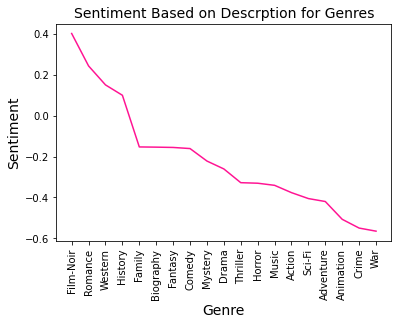

In [ ]:
#Are there differences in sentiment of the description across genre’s? *
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

df['compound'] = df['Description'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
df['sentiment_score'] = df['compound']

genres_s, sentiment=[],[]
for i in range(0,len(df['Genre'])):
  genre_split=df['Genre'][i].split(', ')
  for x in genre_split:
    genres_s.append(x)
    sentiment.append(df['sentiment_score'][i])

sent={
    'Genres':genres_s,
    'sentiment':sentiment
    }

df_s=pd.DataFrame(sent,columns=['Genres','sentiment'])
df_s['sentiment']=df_s['sentiment'].astype(float)
genre_group = df_s.groupby(['Genres']).agg({'sentiment': ['mean']})
genre_group.columns=['sentiment_mean']
results=genre_group.sort_values(by=['sentiment_mean'], ascending=False)

results.head()

fig1, ax1 = plt.subplots()
ax1.plot(results.index,
        results['sentiment_mean'],
        color="deeppink")
plt.xticks(rotation=90)
# set x-axis label
ax1.set_xlabel("Genre", fontsize = 14)
# set y-axis label
ax1.set_ylabel("Sentiment",
              fontsize=14)
plt.title('Sentiment Based on Descrption for Genres', fontsize=14)
plt.show()

***Comment from group: The world cloud section of the report was challenging and we ran into quite a few errors before success. For our word clouds, we used revenue as our metric for determining the top 3 most popular genres. Using online resources, we were able to filter out errors and create a model that worked. ***

Word Cloud for Drama Genre:


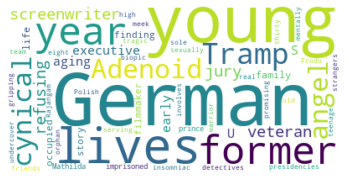

Word Cloud for Action Genre:


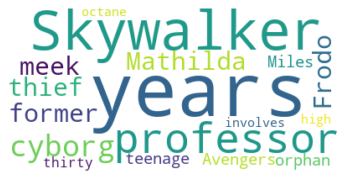

Word Cloud for Adventure Genre:


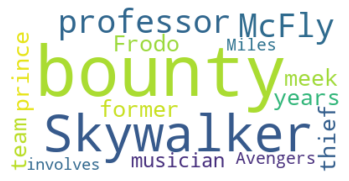

In [ ]:
#Create 3 word clouds using the description column: one for each of the top 3 most popular genres*
from wordcloud import WordCloud
#drama
df_drama = df1[df1['Genre'].str.contains('Drama')]
text = " ".join(i.split()[1] for i in df_drama.Description)
word_cloud = WordCloud(collocations = False, background_color='White').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
print('Word Cloud for Drama Genre:')
plt.show()
#action
df_action = df1[df1['Genre'].str.contains('Action')]
text2 = " ".join(i.split()[1] for i in df_action.Description)
word_cloud2 = WordCloud(collocations = False, background_color='White').generate(text2)
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
print('Word Cloud for Action Genre:')
plt.show()
#adventure
df_adventure = df1[df1['Genre'].str.contains('Adventure')]
text3 = " ".join(i.split()[1] for i in df_adventure.Description)
word_cloud3 = WordCloud(collocations = False, background_color='White').generate(text3)
plt.imshow(word_cloud3, interpolation='bilinear')
plt.axis("off")
print('Word Cloud for Adventure Genre:')
plt.show()

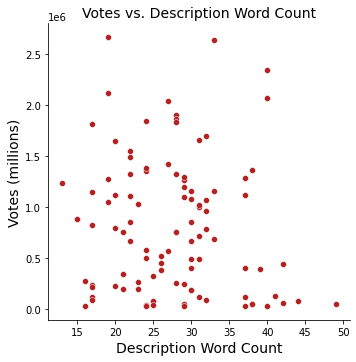

In [ ]:
#Are there any interesting relationships between the text column and any of the other variables in your dataset?*
# Description length and votes?
df1['description_word_count']=df1['Description'].str.count(' ')+1
df1['description_word_count']=pd.to_numeric(df1['description_word_count'])
df1['Votes']=pd.to_numeric(df1['Votes'])
sns.relplot(data = df1, x = 'description_word_count', y = 'Votes', color = 'firebrick')
df1['description_word_count'].corr(df1['Votes'])
plt.xlabel('Description Word Count', fontsize =14)
plt.ylabel("Votes (millions)", fontsize=14)
plt.title('Votes vs. Description Word Count', fontsize=14)
plt.show()

# **5.Comparative Analysis**

***Comment from group: Below we used a lot of matplotlib functions when maybe it could have been more efficient to use seaborn instead. There was more comfortability using matplotlib that lead us to this type of code. ***

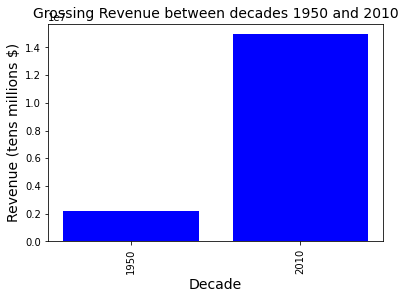

2010 has a larger gross revenue compared to 1950


,Total_Revenue
Decade,
1950,2174636
2010,14943102


In [ ]:
#Pick any two decades and do a comprehensive comparative analysis of movies in those two decades. Your analysis must address at least 5 interesting questions. None of the questions can be those listed in the EDA section of this document. *
#1950
#2010

#1. When comparing 1950 and 2010, what decade had higher grossing revenue?
df1['Revenue']=df1['Revenue'].astype(int)
df1['Decade']=df1['Decade'].astype(str)
decade_compare = df1.groupby(['Decade']).agg({'Revenue': ['sum']})
decade_compare.columns=['Total_Revenue']
decade_list = ['1950', '2010']
decade_compare = decade_compare[decade_compare.index.isin(decade_list)]
plt.bar(decade_compare.index, decade_compare['Total_Revenue'], color ='blue')
plt.xticks(rotation=90)
plt.xlabel("Decade", fontsize =14)
plt.ylabel("Revenue (tens millions $)", fontsize=14)
plt.title('Grossing Revenue between decades 1950 and 2010', fontsize=14)
plt.show()
print('2010 has a larger gross revenue compared to 1950')
decade_compare


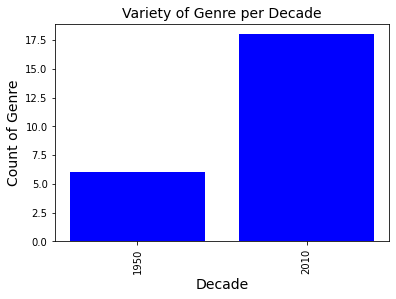

The 2010 Decade had 18 different genres, while 1950 only had 6.


Decade
1950     6
2010    18
Name: Genre, dtype: int64

In [ ]:
#2. When comparing 1950 and 2010, what decade had more variety in genres?

df_genre_decade = df1.groupby('Decade')['Genre'].count()
df_genre_decade = df_genre_decade[df_genre_decade.index.isin(decade_list)]
plt.bar(df_genre_decade.index, df_genre_decade.values, color ='blue')
plt.xticks(rotation=90)
plt.xlabel("Decade", fontsize =14)
plt.ylabel("Count of Genre", fontsize=14)
plt.title('Variety of Genre per Decade', fontsize=14)
plt.show()
print('The 2010 Decade had 18 different genres, while 1950 only had 6.')
df_genre_decade

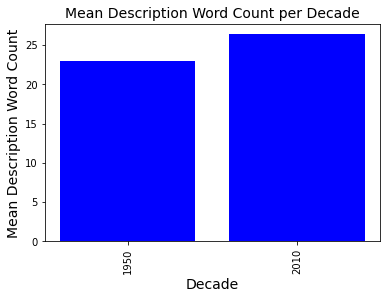

The 2010 Decade had a slightly higher word count on average.


,Mean Word Count
Decade,
1950,23.000000
2010,26.388889


In [ ]:
#3. When comparing 1950 and 2010, which decade on average had longer descriptions?
df1['description_word_count']=df1['description_word_count'].astype(int)
df1['Decade']=df1['Decade'].astype(str)
df_decade_description = df1.groupby(['Decade']).agg({'description_word_count': ['mean']})
df_decade_description.columns=['Mean Word Count']
decade_list = ['1950', '2010']
df_decade_description = df_decade_description[df_decade_description.index.isin(decade_list)]
plt.bar(df_decade_description.index, df_decade_description['Mean Word Count'], color ='blue')
plt.xticks(rotation=90)
plt.xlabel("Decade", fontsize =14)
plt.ylabel("Mean Description Word Count", fontsize=14)
plt.title('Mean Description Word Count per Decade', fontsize=14)
plt.show()
print('The 2010 Decade had a slightly higher word count on average.')
df_decade_description

In [ ]:
#4. When comparing 1950 and 2010, who were the least popular directors in terms of number of votes?
df1['Votes']=df['Votes'].astype(int)
df_decade_director=df1.groupby(['Decade','Directors'],as_index=False).agg({'Votes':['sum']})
df_decade_director.columns = ['Decade', 'Director', 'Total Votes']
decade_list_1950 = ['1950']
decade_list_2010 = ['2010']
df_decade_director = df_decade_director[df_decade_director.Decade.isin(decade_list_1950)]
df_decade_director = df_decade_director.sort_values(by = ['Total Votes'], ascending = True)
print('1950s Least Popular Directors in Terms of Number of Votes:')
display(df_decade_director.head())

df_decade_director2=df1.groupby(['Decade','Directors'],as_index=False).agg({'Votes':['sum']})
df_decade_director2.columns = ['Decade', 'Director', 'Total Votes']
decade_list_1950 = ['1950']
decade_list_2010 = ['2010']
df_decade_director2 = df_decade_director2[df_decade_director2.Decade.isin(decade_list_2010)]
df_decade_director2 = df_decade_director2.sort_values(by = ['Total Votes'], ascending = True)
print('2010s Least Popular Directors in Terms of Number of Votes:')
display(df_decade_director2.head())

1950s Least Popular Directors in Terms of Number of Votes:


,Decade,Director,Total Votes
8,1950,Stanley Kubrick,198213
4,1950,Akira Kurosawa,346388
6,1950,Billy Wilder,348993
5,1950,Alfred Hitchcock,492132
7,1950,Sidney Lumet,788910


2010s Least Popular Directors in Terms of Number of Votes:


,Decade,Director,Total Votes
71,2010,Vetrimaaran,29913
60,2010,C. Prem Kumar,31712
64,2010,Lokesh Kanagaraj,32796
67,2010,Nitesh Tiwari,55140
66,2010,Nadine Labaki,90308


In [ ]:
#5. When comparing 1950 and 2010, what were the top 5 movies in terms of IMBD score?
df1['IMDB Score']=df['IMDB Score']
df1['IMDB Score']=df['IMDB Score'].astype(int)
df_decade_imdb=df1.groupby(['Decade', 'Title'],as_index=False).agg({'IMDB Score':['max']})
df_decade_imdb.columns = ['Decade', 'Title', 'IMDB Score']
decade_list_1950 = ['1950']
decade_list_2010 = ['2010']
df_decade_imdb = df_decade_imdb[df_decade_imdb.Decade.isin(decade_list_1950)]
df_decade_imdb = df_decade_imdb.sort_values(by = ['IMDB Score'], ascending = True)
print('1950s Top 5 movies in terms of IMDB Score:')
display(df_decade_imdb.head())

df_decade_imdb2=df1.groupby(['Decade', 'Title'],as_index=False).agg({'IMDB Score':['max']})
df_decade_imdb2.columns = ['Decade', 'Title', 'IMDB Score']
decade_list_1950 = ['1950']
decade_list_2010 = ['2010']
df_decade_imdb2 = df_decade_imdb2[df_decade_imdb2.Decade.isin(decade_list_2010)]
df_decade_imdb2 = df_decade_imdb2.sort_values(by = ['IMDB Score'], ascending = True)
print('2010 Top 5 movies in terms of IMDB Score:')
display(df_decade_imdb2.head())



1950s Top 5 movies in terms of IMDB Score:


,Decade,Title,IMDB Score
5,1950,12 Angry Men,7
8,1950,Seven Samurai,36
7,1950,Rear Window,58
10,1950,Witness for the Prosecution,96
6,1950,Paths of Glory,97


2010 Top 5 movies in terms of IMDB Score:


,Decade,Title,IMDB Score
77,2010,Inception,12
78,2010,Interstellar,25
80,2010,Kaithi,38
69,2010,96,39
81,2010,Parasite,40


# **# 6.Multivariate Analysis**

In [ ]:
#Create a regression model to determine which of the following variables predicts revenue: number of words in a title, Number of Words in the Description, Score, Metascore , Vote and Runtime*
df1['title_word_count']=df1['Title'].str.count(' ')+1
df_regression1 = df1[df1.Score != ''].copy(deep=True)
df_regression1 = df_regression1[df_regression1['IMDB Score'] != ''].copy(deep=True)
df_regression1 = df_regression1[df_regression1.Revenue != ''].copy(deep=True)
from sklearn import linear_model
import statsmodels.api as sm
df_regression = df_regression1.dropna()
x = df_regression[['title_word_count','description_word_count','Score','IMDB Score', 'Votes', 'Duration']]
y = df_regression['Revenue']
regr = linear_model.LinearRegression()
regr.fit(x, y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

model = sm.OLS(np.array(y, dtype = int), np.array(x, dtype = int)).fit()
predictions = model.predict(np.array(x, dtype = int))

print_model = model.summary()
print(print_model)
print('')
print('\033[1m' + 'According to the regression model: evaluating the p-value and level of significance, it is clear Revenue can be predicted by Votes')


Intercept: 
 6.984919309616089e-10
Coefficients: 
 [ 1.20908224e-15  6.32616182e-12 -1.05000237e-11  1.98610625e-12
  1.00000000e+00 -3.45245127e-13]
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          8.790e+31
Date:                Thu, 15 Dec 2022   Prob (F-statistic):                        0.00
Time:                        17:00:37   Log-Likelihood:                          1629.8
No. Observations:                  81   AIC:                                     -3248.
Df Residuals:                      75   BIC:                                     -3233.
Df Model:                           6                                                  
Covariance Type:            nonrobust                     